<a href="https://colab.research.google.com/github/stableminded/Synapse_lp/blob/Week_4/Dhairya_SynapseLP_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
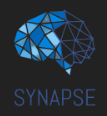

In the task for this week, we will be exploring another ML Models like Decision Tree, Random Forest and Naive Bayes. We will also learn hyperparameter tuning using ensemble techniques (Bagging & Boosting) and Decision Tree Pruning.

**This Task has various theory questions to be answered here and there. Don't miss out on those, as they will make you'll conceptually stronger, and give a better understanding.**

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

# Decision Tree Classifier

* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

Load the titanic dataset in a pandas dataframe (download dataset from https://www.kaggle.com/c/titanic/data and store it in the "Synapse" folder initially created for the interview tasks) Note that you have to download the train and test csv files seperately

<b>Read the titanic_data.csv using pandas and show the dataframe</b>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#write code here
import pandas as pd

df_train = pd.read_csv('/content/drive/My Drive/Synapse/train.csv')

In [5]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Visualizing hidden Details

* print the name column of the data
* notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
* extract the title using regular expression (help given below in the code)
* store the title in a new column in the dataframe. Name the column : Title

In [6]:
# try researching about regex
import re
print(df_train['Name'])
def extract_title(text):
    match = re.search(r',\s*(\w+\.)', text)
    if match:
        return match.group(1)
    else:
        return None
df_train['Title'] = df_train['Name'].apply(extract_title)

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


In [7]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.


### Removing unnecessary columns
*   The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
*   We will also remove the Name column as we have done feature extraction and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [8]:
#write code here
df_train.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

### Nan analysis
*   write code to find the percentage of Nans in each column and visualize it in a tabular format
*   remove any column having more than 50% Nans as they would be of no use

In [9]:
#write code here
nan_perct_train = (df_train.isnull().sum() / len(df_train)) * 100
nan_df_train = pd.DataFrame({'Column': df_train.columns, 'NaN Percentage': nan_perct_train})

nan_df_train

,Column,NaN Percentage
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Sex,Sex,0.000000
Age,Age,19.865320
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Fare,Fare,0.000000
Cabin,Cabin,77.104377
Embarked,Embarked,0.224467
Title,Title,0.112233


In [10]:
df_train.drop(['Cabin'],axis=1,inplace=True)

*   Fill Nans in the Embark column with the statistical mode
*   Fill Nans in the Age column with it's statistical mean

In [11]:
mode = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(mode, inplace=True)
mean= df_train['Age'].mean()
df_train['Age'].fillna(mean, inplace=True)

### Adding features to the dataset
*   Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
*   Using that create a new column called **Family_members**
*   Fill it with the sum of SibSP and Parch

In [12]:
#write code here
df_train['Family_members'] =df_train['SibSp'] + df_train['Parch']
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,male,22.000000,1,0,7.2500,S,Mr.,1
1,1,1,female,38.000000,1,0,71.2833,C,Mrs.,1
2,1,3,female,26.000000,0,0,7.9250,S,Miss.,0
3,1,1,female,35.000000,1,0,53.1000,S,Mrs.,1
4,0,3,male,35.000000,0,0,8.0500,S,Mr.,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Rev.,0
887,1,1,female,19.000000,0,0,30.0000,S,Miss.,0
888,0,3,female,29.699118,1,2,23.4500,S,Miss.,3
889,1,1,male,26.000000,0,0,30.0000,C,Mr.,0


In [13]:
#Normalize the columns ("Age", "Fare", "Family_members")
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

col= ["Age", "Fare", "Family_members"]

df_train[col] = scaler.fit_transform(df_train[col])

In [14]:
#apply one hot encoding on the columns ('Pclass','Sex','Title','Embarked')
df_train= pd.get_dummies(df_train, columns=['Pclass', 'Sex', 'Title', 'Embarked'])

<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [15]:
df_train

,Survived,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,1,0,0.014151,0.1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0.472229,1,0,0.139136,0.1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,1,0.321438,0,0,0.015469,0.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,1,0,0.103644,0.1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0.434531,0,0,0.015713,0.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0,0,0.025374,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
887,1,0.233476,0,0,0.058556,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
888,0,0.367921,1,2,0.045771,0.3,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
889,1,0.321438,0,0,0.058556,0.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [16]:
#write code here
y_label=df_train['Survived']

<b>remove the y_label (survived) from the dataframe</b>

In [17]:
#write code here
df_train.drop('Survived',axis=1,inplace=True)

<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [18]:
#write code here
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_train,y_label,test_size=0.3,random_state=108)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [19]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=9)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=9)

<b>Print the Model Accuracy</b>

In [20]:
dt.score(X_train,y_train)

0.9871589085072231

In [21]:
#write code here
predictions=dt.predict(X_test)
from sklearn.metrics import accuracy_score
acc_1=accuracy_score(y_test, predictions)
print((round(acc_1,5)*100))

79.104


## Explain: Give a Real life Example where Decision Tree Classifier can be used.

Ans: Kya mai college jaau ya nai ,
nai jaaunga to kya gharpe kaam krunga ya tp , jaaunga to college me kaam hoga ya tp , college me nai jaaunga to kuch smjhega ki nai , college nai jaunga to attendance ka kya but fir travel kaun kare itna , the list goes on and on.

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [136]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
import matplotlib.pyplot as plt
train_accuracy=[]
test_accuracy=[]
dt_2= DecisionTreeClassifier(random_state=108,criterion='entropy')
best_depth=0
best_accuracy=0
for depth in range(1, 11):
    dt_2.set_params(max_depth=depth)
    dt_2.fit(X_train, y_train)
    train_predictions = dt_2.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, train_predictions))
    test_predictions = dt_2.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, test_predictions))

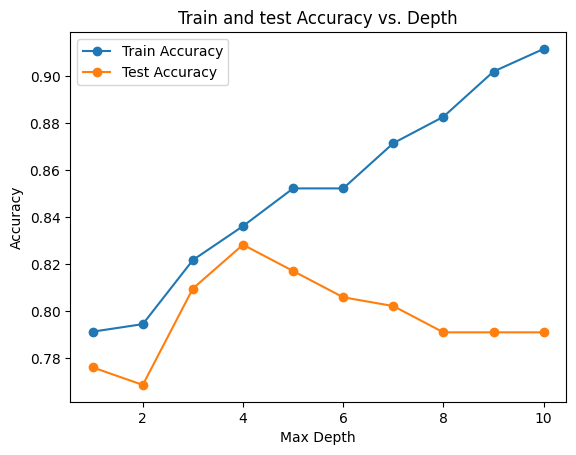

In [137]:
import matplotlib.pyplot as plt
depth = [i for i in range(1, 11)]
plt.plot(depth, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(depth, test_accuracy, label='Test Accuracy', marker='o')
plt.title('Train and test Accuracy vs. Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [138]:
dt_3=DecisionTreeClassifier(random_state=54)
dt_3.fit(X_train,y_train)

DecisionTreeClassifier(random_state=54)

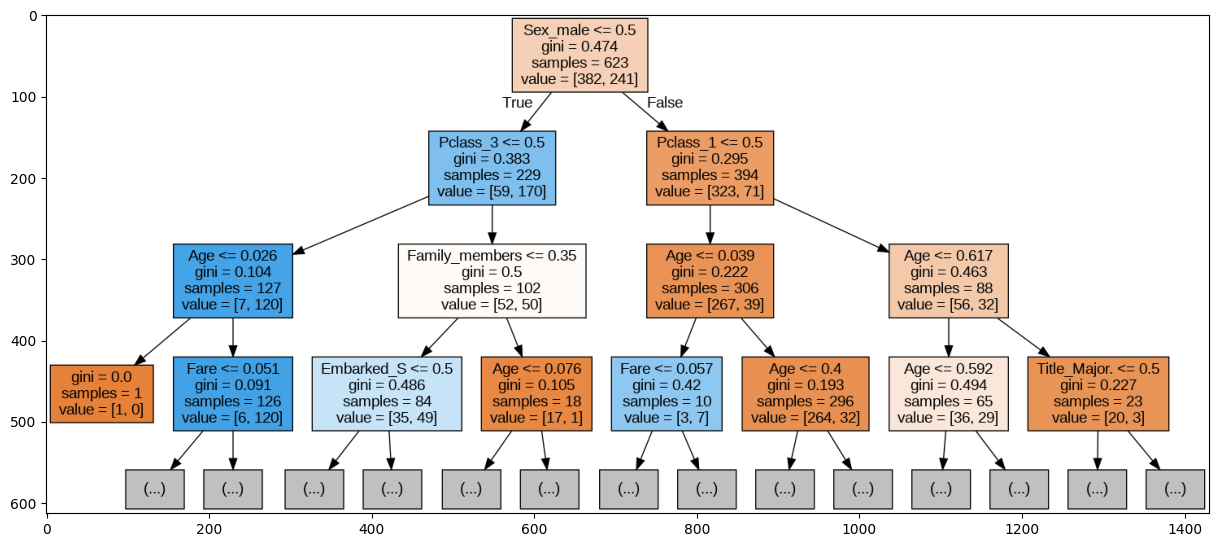

In [26]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt_3, out_file='tree.dot', feature_names=X_train.columns, max_depth=3, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [139]:
dt_max_entropy=DecisionTreeClassifier(random_state=108,criterion='entropy',max_depth=4) #from the chart plotted before the graphwiz one
dt_max_entropy.fit(X_train,y_train)
print('Train accuracy: ',round(accuracy_score(y_train,dt_max_entropy.predict(X_train)),4)*100,'%')
print('Test accuracy: ',round(accuracy_score(y_test,dt_max_entropy.predict(X_test)),4)*100,'%')

Train accuracy:  83.63000000000001 %
Test accuracy:  82.84 %


## Explain: What is your understanding of the charts you made above?

Ans:

As the socio economic status increased the woman's survival chance increased . More women survived in higher Pclasses compared to the lower ones.

Similarly for males , those who were in lower Pclasses , most of them were not able to make it , and in males the titles mattered too , higher the title better the chances are that the person survived.


# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [28]:
# Write a code to implement naive bayes algorithm, and give the accuracy for the same
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
print(round(accuracy_score(y_test,y_pred_nb),5)*100,'%')

65.672 %


## Explain: What is the difference between Decision Tree Classifier and Naive Bayes algorithm?

Ans:According to the resources I read and saw(some additional too) , the decesion tree classifier would handle categorical data well as well as numerical data naturally , but in the case of naive bayes , categorical data is handledwell , but sometimes the numerical data might require some pre-processing

Other than that decesion tree goes down moves from one leaf node to another on the basis of gini impurity or entropy , whereas in naive bayes it just calculates probabilites on Baye's theorem which is its deciding factor for categorization.

For the disadvantages :

In case of decesion trees , more deep they are , higher the chances of overfitting, therefore pruning becomes necessary or limiting the max depth.

In naive bayes , well it assumes that the features are conditionally independent , it does not consider the context or the interdependance of the data well  , I mean it will consider 'u suck' and 'suck u' as the same 😶 , its called naive for a reason aint it😂.

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [29]:
#write code here
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
from sklearn.metrics import roc_curve , auc
y_pred_rf=rf.predict(X_test)
false_positive_rate , true_positive_rate , thresholds = roc_curve(y_test,y_pred_rf)
roc_auc=auc(false_positive_rate,true_positive_rate)
print(roc_auc)
print(accuracy_score(y_test,y_pred_rf))

0.8085314519475899
0.832089552238806


## Explain: Under what condition will Random Forest and Decision Trees have the same accuracy?

Ans: If we properly tune the hyperparameters in the random forest like max depth , max leaf nodes and minimum samples per leaf , we can get similar accuracy in random forest as that of decesion trees. Or the other way around it is we use decesion trees in a way where each decesion tree is given bootstrapped data and is pruned correctly following the same max depth as one is giving to the random forest classifier.

## Extra - BaggingClassifier

In [31]:
#write a code to implement BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
base=RandomForestClassifier()
n_estimators=15
bagging_classifier=BaggingClassifier(base,n_estimators=n_estimators)
bagging_classifier.fit(X_train,y_train)
y_pred_bc=bagging_classifier.predict(X_test)
print(round(accuracy_score(y_test,y_pred_bc),4)*100,'%')

83.21 %


In [32]:
# Now putting tht bagging cf into grid search cv
param_grid = {
    'n_estimators':[20,25,30,35,40,45],
    'bootstrap':[True,False]
}
grid=GridSearchCV(estimator=bagging_classifier,param_grid=param_grid,cv=3,verbose=3)

In [33]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END ...bootstrap=True, n_estimators=20;, score=0.808 total time=   3.8s
[CV 2/3] END ...bootstrap=True, n_estimators=20;, score=0.779 total time=   4.5s
[CV 3/3] END ...bootstrap=True, n_estimators=20;, score=0.802 total time=  10.5s
[CV 1/3] END ...bootstrap=True, n_estimators=25;, score=0.817 total time=  13.8s
[CV 2/3] END ...bootstrap=True, n_estimators=25;, score=0.788 total time=   9.0s
[CV 3/3] END ...bootstrap=True, n_estimators=25;, score=0.802 total time=   4.4s
[CV 1/3] END ...bootstrap=True, n_estimators=30;, score=0.808 total time=  12.0s
[CV 2/3] END ...bootstrap=True, n_estimators=30;, score=0.793 total time=  15.3s
[CV 3/3] END ...bootstrap=True, n_estimators=30;, score=0.802 total time=  10.6s
[CV 1/3] END ...bootstrap=True, n_estimators=35;, score=0.837 total time=   9.9s
[CV 2/3] END ...bootstrap=True, n_estimators=35;, score=0.793 total time=   7.8s
[CV 3/3] END ...bootstrap=True, n_estimators=35;

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=RandomForestClassifier(),
                                         n_estimators=15),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [20, 25, 30, 35, 40, 45]},
             verbose=3)

In [34]:
best_params = grid.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': True, 'n_estimators': 35}


In [35]:
print(grid.score(X_train,y_train))
print(grid.score(X_test,y_test))

0.9309791332263242
0.8208955223880597


## Explain: What is the difference between Random Forest and Bagging Classifier

Ans:In random forest you can provide feature selection , whereas bagging classifier uses all available features in general.
In random forest the base estimators are always decesion trees whereas in Bagging Classifier , you can select your base estimator
In Random forest , the correlation between each decesion tree can be less due to the feature selection , in bagging classifier , if your base model is a pretty basic decesion tree , then that might not be the case.

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [36]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
adamodel=AdaBoostClassifier(n_estimators=180,learning_rate=1,algorithm='SAMME')
adamodel.fit(X_train,y_train)
y_pred_abc=adamodel.predict(X_test)
print(accuracy_score(y_test,y_pred_abc))

0.8134328358208955


## Explain: What is the difference between Bagging and Boosting?

Ans:

*   In bagging , the data is bootstrapped and given to various base models , whereas in boosting , each model is trained on the whole data

*   In boosting the trees made are usually stumps(one tree two leafs , basically weak learners) , in bagging that may or may not be the case

*   In bagging , each model is given equal weight in the final result , In boosting , each model is given weightage based on its performance.

*   In bagging each model is independently made and run , whereas in boosting the next model is made keeping inmind the previous model's mistake




### 3. Pruning Techniques

https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107

In [152]:
#write code here
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid
param_grid={
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
clf=  DecisionTreeClassifier()
grid_2=GridSearchCV(clf, param_grid, cv=5)
"""grid search cv is better than parameter grid , so I am using that only ,
 Ik usko pruning ke liye import kiya tha but that kaggle code you gave in the resources , uska method better laga to usi se karra hu"""
grid_2.fit(X_train,y_train)
best_classifier=grid_2.best_estimator_

In [153]:
print(grid_2.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}


In [154]:
print(round(accuracy_score(y_test,best_classifier.predict(X_test)),4)*100,'%')

79.47999999999999 %


In [155]:
path = clf.cost_complexity_pruning_path(df_train, y_label)
""" Here I am making a change ,
 the path should be calculated on the original dataset as a whole and then the optimum alpha should be carried out by finding on the train and test datasets ,
 this was taught in the stat quest video I saw and whose link was also attatched in the kaggle code additionally provides"""
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

[0.00000000e+00 2.04060810e-05 4.67639357e-05 5.34444979e-05
 9.79815795e-05 1.33914907e-04 1.87055743e-04 2.24466891e-04
 2.99289188e-04 3.74111485e-04 3.74111485e-04 3.74111485e-04
 3.74111485e-04 3.74111485e-04 3.74111485e-04 4.98815314e-04
 5.26094276e-04 5.44162160e-04 5.53373239e-04 5.61167228e-04
 6.23519142e-04 6.65087085e-04 6.98341439e-04 7.32634992e-04
 7.46167413e-04 7.48222970e-04 7.48222970e-04 7.48222970e-04
 7.48222970e-04 7.48222970e-04 7.48222970e-04 7.89334123e-04
 8.13692480e-04 8.41750842e-04 8.41750842e-04 8.53441826e-04
 8.66363439e-04 8.97867565e-04 8.97867565e-04 9.70351665e-04
 9.70908378e-04 9.86412922e-04 9.97630627e-04 1.01350202e-03
 1.01858925e-03 1.02030405e-03 1.02880658e-03 1.04751216e-03
 1.05938300e-03 1.12233446e-03 1.13754396e-03 1.16041366e-03
 1.17321676e-03 1.19715675e-03 1.23619447e-03 1.34680135e-03
 1.39379053e-03 1.44142955e-03 1.45109909e-03 1.45903479e-03
 1.46821111e-03 1.53045608e-03 1.60333494e-03 1.66011972e-03
 1.79573513e-03 1.795735

In [156]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
# Removed the fully grown tree ka alpha
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

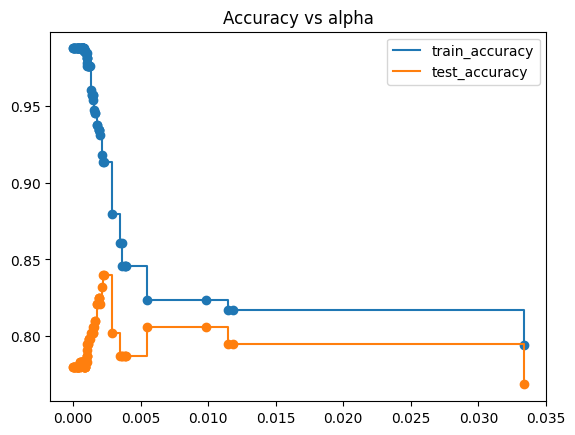

In [157]:
train_acc=[]
test_acc=[]
for model in clfs:
    y_train_pred_prun = model.predict(X_train)
    y_test_pred_prun = model.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred_prun,y_train))
    test_acc.append(accuracy_score(y_test_pred_prun,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [159]:
pruned_clf= DecisionTreeClassifier(random_state=0,ccp_alpha=0.0022)
pruned_clf.fit(X_train,y_train)
y_train_pred_pruned = pruned_clf.predict(X_train)
y_test_pred_pruned = pruned_clf.predict(X_test)

print('Train score' ,round(accuracy_score(y_train_pred_pruned,y_train),4)*100,'%')
print('Test score' ,round(accuracy_score(y_test_pred_pruned,y_test),4)*100,'%')


"""I wanted to run a loop here calculating the maximum accuracy score rather than figuring out from a graph
but then I could be biased in that loop , I could either improve the train accuracy or the test accuracy
because now from the graph I know that the places where the train accuracy was good , the test accuracy wasn't always at its best there."""

Train score 91.33 %
Test score 83.96000000000001 %


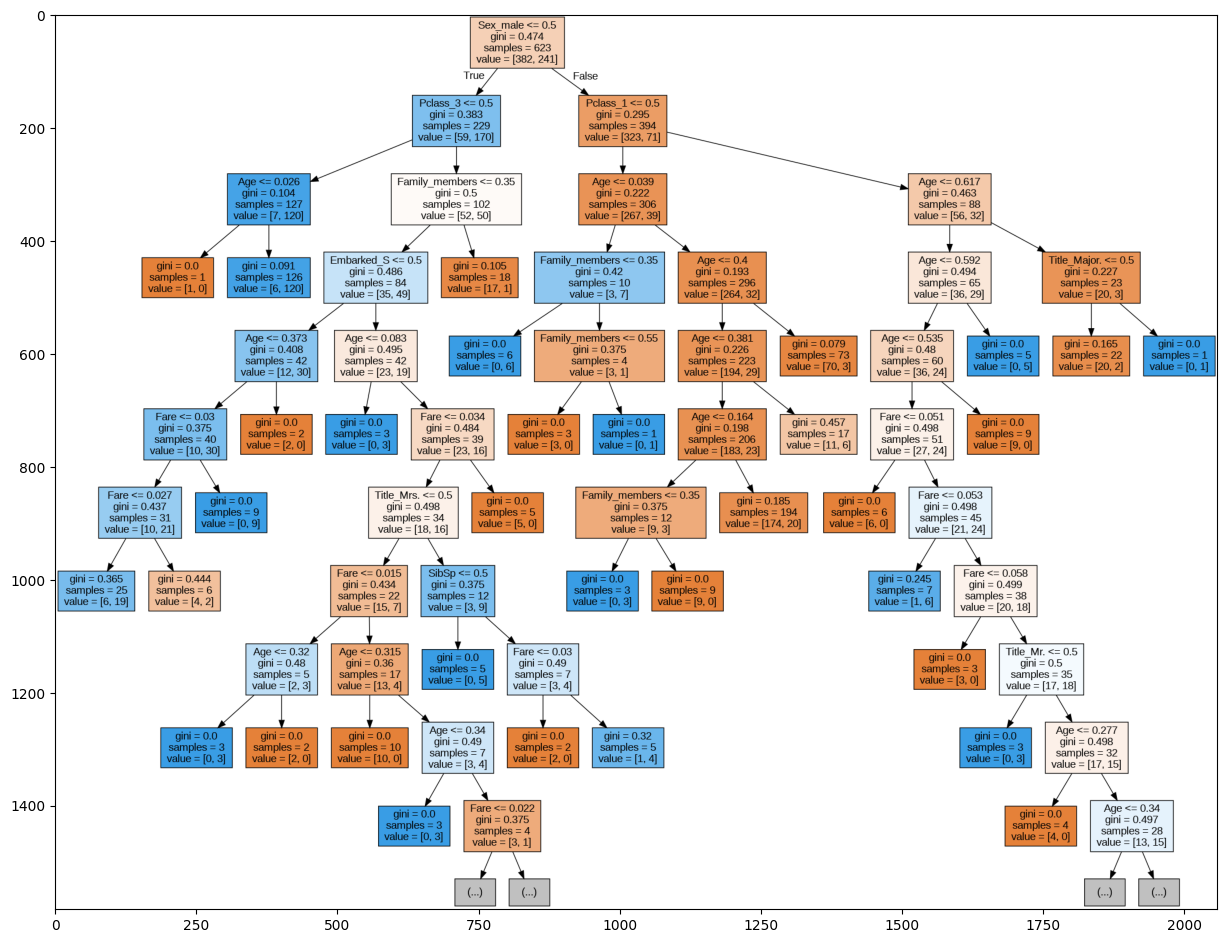

In [72]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique
print_tree = tree.export_graphviz(pruned_clf, out_file='tree.dot', feature_names=X_train.columns, max_depth=10, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

In [ ]:
# Pruning ke naam pe hardly kuch reduce prune hua 😭😂, the best alpha was sooooo smalll , theek hai dataset to dataset it will vary but atleast accuracy improved

In [115]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(pruned_clf, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy: ",cross_val_scores.mean())
print("Standard Deviation: ",cross_val_scores.std())


Cross-Validation Scores: [0.88888889 0.82539683 0.87301587 0.82258065 0.83870968 0.72580645
 0.77419355 0.83870968 0.82258065 0.83870968]
Mean Accuracy:  0.8248591909882231
Standard Deviation:  0.04402669789022098


In [ ]:
"""Therefore best model accuracy yet is given by pruned_clf which is 83.96 and as I also did its cross validation in the above cell I know that it has not been overfitted
as it has low variance and the average accuracy score by cross validation score is also good and so,
I get the brownie points mentioned below :) """

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

## Explain: After studying these techniques, analyse which method gives you the best accuracy and choose it as your most optimal model.

Ans:Pruned Decesion Trees gave me the best accuracy i.e. 83.96% , its my most optimal model yet , ik more optimal was possible here , atleast by 1 - 1.5 % but theek hai , could be my random states maybe.


# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **XG Boost Classifier and Regressor**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2023 - 2024